# GRIP -THE SPARKS FOUNDATION- DATA SCIENCE AND BUSSINESS ANALYTICS INTERNSHIP

## GRIPNOV2022

## By Shubham Panwar


## Task1

## To predict the score of a student who studies for 8.16 hrs/day

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Importing data set


In [18]:
df =pd.read_csv('C:/Users/shubham/OneDrive/Desktop/student_data.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [20]:
print("First 5 elemnts of the given data set")
df.head()

First 5 elemnts of the given data set


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
df.shape

(25, 2)

In [23]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [24]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

## Summary Statistics

In [25]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Missing values

In [27]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

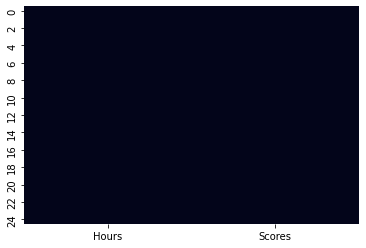

In [28]:
sns.heatmap(df.isnull(),cbar = False)

## Outliers

In [29]:
#percentile of each predictors
df.quantile([0.01,.05,.10,.15,.25,.5,.8,.85,0.9,.95,.99,1])

,Hours,Scores
0.01,1.196,17.72
0.05,1.580,20.20
0.10,2.140,22.20
0.15,2.500,24.60
0.25,2.700,30.00
0.50,4.800,47.00
0.80,7.720,77.00
0.85,8.000,82.60
0.90,8.420,85.60
0.95,8.820,87.60


## To check outliers

<AxesSubplot:xlabel='Scores'>

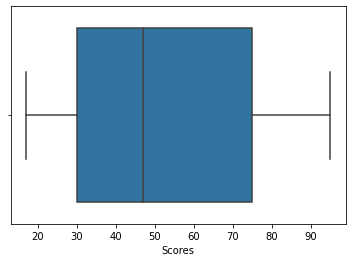

In [31]:
sns.boxplot(df.Scores)

<AxesSubplot:xlabel='Hours'>

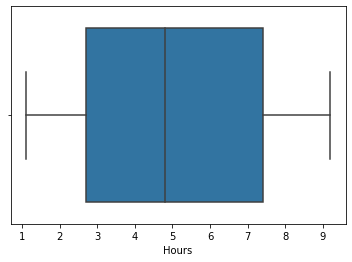

In [32]:
sns.boxplot(df.Hours)

## Visualiing Target variable Distribution

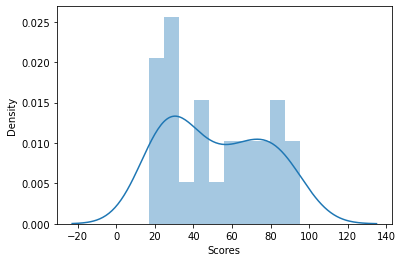

In [37]:
sns.distplot(df['Scores'],bins = 10)
plt.show()

## Correlation matrics

<AxesSubplot:>

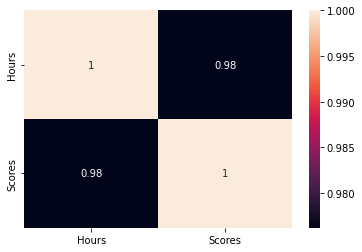

In [38]:
sns.heatmap(df.corr(),annot = True)

## Visualizing data with scatter plots

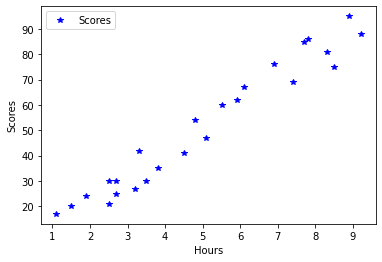

In [39]:
df.plot(x = 'Hours', y = 'Scores', style = '*', color = 'blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## preparing the training data for linear Regression

In [40]:
x = df.drop("Scores",axis = 1)
y = df['Scores']

## Splitting data set for trainning and trsting 

In [43]:
x_train ,x_test , y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


## Trainning Linear Regression Model

In [67]:
scores_reg = LinearRegression()
scores_reg.fit(x_train ,y_train)

LinearRegression()

## Predicting Scores 

In [47]:
y_pred = scores_reg.predict(x_test)
y_pred

array([87.25122481, 39.72864568, 27.61504708, 51.84224428, 61.16039705,
       29.47867763, 29.47867763, 77.00125676])

## Evaluating Train and Test scores

In [52]:
print('Trainning Score:',scores_reg.score(x_train,y_train))
print('Test Score :',scores_reg.score(x_test,y_test))

Trainning Score: 0.949284101022747
Test Score : 0.9528804618016085


## Comparing actual scores and predicted scores

In [72]:
output = pd.DataFrame({'Actual Scores':y_test,'predicted Score':y_pred,'Residual': y_test-y_pred})
print(output.head())

    Actual Scores  predicted Score  Residual
15             95        87.251225  7.748775
22             35        39.728646 -4.728646
16             30        27.615047  2.384953
1              47        51.842244 -4.842244
18             67        61.160397  5.839603


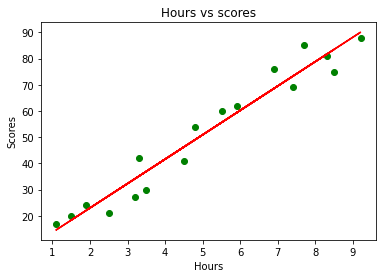

In [110]:
plt.scatter(x_train,y_train,color = 'green')
plt.plot(x_train.squeeze(), scores_reg.predict(x_train),color = 'red')
plt.title('Hours vs scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Testing data scores vs predicted scores

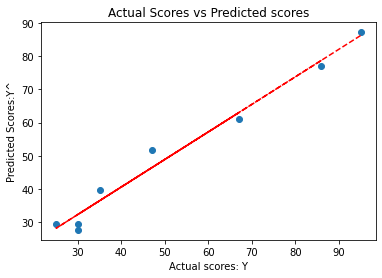

In [87]:
x =y_test
y =y_pred
plt.scatter(x,y)
plt.xlabel("Actual scores: Y")
plt.ylabel("Predicted Scores:Y^")
plt.title("Actual Scores vs Predicted scores")

z =np.polyfit(x,y,1)
p =np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()


# Errors
# Mean Evolution on test sample

## Mean absolute error

In [89]:
print('Mean absolute error :',metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error : 4.942870532100711


## Root mean square error

In [90]:
 print('Root mean square error :',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root mean square error : 5.555938374337579


## Fit-R2

In [93]:
metrics.r2_score(y_test,y_pred)

0.9528804618016085

# What will be the predicted score if a student study for 8.16 hours

In [100]:
study_hours = 8.16
score_pred = scores_reg.predict([[study_hours]])
print("Numbesrs of hours = {}".format(study_hours))
print("predicted score = {}".format(score_pred[0]))

Numbesrs of hours = 8.16
predicted score = 80.35579176074638
